# Cleaning Fantasy Football Player Data from 2021

### Data downloaded from <a href= "https://fantasydata.com/">FantasyData</a>

### Import Libraries

In [2]:
# import libraries

import pandas as pd
import numpy as np
import sys
import requests
import matplotlib.pyplot as plt
import seaborn as sbn
!pip install openpyxl

## Players Data Set

### Clean Player Data

In [3]:
# load and view data
players = pd.read_csv("Player.2021.csv")
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlayerID              4103 non-null   int64  
 1   Team                  2486 non-null   object 
 2   Number                2317 non-null   float64
 3   FirstName             4103 non-null   object 
 4   LastName              4103 non-null   object 
 5   Position              4103 non-null   object 
 6   Status                4103 non-null   object 
 7   Height                4103 non-null   object 
 8   Weight                4103 non-null   int64  
 9   BirthDate             4076 non-null   object 
 10  College               4103 non-null   object 
 11  Experience            4102 non-null   float64
 12  FantasyPosition       4103 non-null   object 
 13  PositionCategory      4103 non-null   object 
 14  PhotoUrl              4103 non-null   object 
 15  ByeWeek              

In [4]:
#remove unnecessary columns
to_drop = ['FanDuelPlayerID',
          'DraftKingsPlayerID', 
          'FanDuelName',
          'DraftKingsName']
players.drop(to_drop, inplace=True, axis=1)

# replace NaN's with empty strings
player = players.replace(np.nan, '', regex=True)
player.head()

,PlayerID,Team,Number,FirstName,LastName,Position,Status,Height,Weight,BirthDate,...,PhotoUrl,ByeWeek,AverageDraftPosition,CollegeDraftTeam,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick,IsUndraftedFreeAgent,InjuryStatus,TeamID
0,430,,,Sam,Koch,P,Inactive,"6'1""",222,8/13/1982 12:00:00 AM,...,https://s3-us-west-2.amazonaws.com/static.fant...,,,BAL,2006.0,6.0,203.0,False,,
1,722,,,Jason,Witten,TE,Inactive,"6'6""",263,5/6/1982 12:00:00 AM,...,https://s3-us-west-2.amazonaws.com/static.fant...,,,DAL,2003.0,3.0,69.0,False,,
2,1658,,,Greg,Olsen,TE,Inactive,"6'5""",255,3/11/1985 12:00:00 AM,...,https://s3-us-west-2.amazonaws.com/static.fant...,,,CHI,2007.0,1.0,31.0,False,,
3,2982,,,Stephen,Gostkowski,K,Inactive,"6'1""",215,1/28/1984 12:00:00 AM,...,https://s3-us-west-2.amazonaws.com/static.fant...,,,NE,2006.0,4.0,118.0,False,,
4,3807,,,Ben,Roethlisberger,QB,Inactive,"6'5""",240,3/2/1982 12:00:00 AM,...,https://s3-us-west-2.amazonaws.com/static.fant...,,,PIT,2004.0,1.0,11.0,False,,


In [5]:
#concatenate first and last name
players['FullName'] = players.FirstName.str.cat(players.LastName, sep=' ')
players.head()

,PlayerID,Team,Number,FirstName,LastName,Position,Status,Height,Weight,BirthDate,...,ByeWeek,AverageDraftPosition,CollegeDraftTeam,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick,IsUndraftedFreeAgent,InjuryStatus,TeamID,FullName
0,430,NaN,NaN,Sam,Koch,P,Inactive,"6'1""",222,8/13/1982 12:00:00 AM,...,NaN,NaN,BAL,2006.0,6.0,203.0,False,NaN,NaN,Sam Koch
1,722,NaN,NaN,Jason,Witten,TE,Inactive,"6'6""",263,5/6/1982 12:00:00 AM,...,NaN,NaN,DAL,2003.0,3.0,69.0,False,NaN,NaN,Jason Witten
2,1658,NaN,NaN,Greg,Olsen,TE,Inactive,"6'5""",255,3/11/1985 12:00:00 AM,...,NaN,NaN,CHI,2007.0,1.0,31.0,False,NaN,NaN,Greg Olsen
3,2982,NaN,NaN,Stephen,Gostkowski,K,Inactive,"6'1""",215,1/28/1984 12:00:00 AM,...,NaN,NaN,NE,2006.0,4.0,118.0,False,NaN,NaN,Stephen Gostkowski
4,3807,NaN,NaN,Ben,Roethlisberger,QB,Inactive,"6'5""",240,3/2/1982 12:00:00 AM,...,NaN,NaN,PIT,2004.0,1.0,11.0,False,NaN,NaN,Ben Roethlisberger


## Exploration of Player Heights

In [8]:
#clean heights 

height = np.array(players["Height"])

x = 0
for i in height:
    height[x] = int(i[0:1])*30.48 + int(i[2:i.find('"')])*2.54
    x += 1

In [9]:
#calculate mean, standard deviation, min and max of player heights
print("Mean of Player Heights = ", height.mean())
print("Standard Deviation of Player Heights = ", height.std())
print("Shortest Player Height = ", height.min())
print("Tallest Player Height = ", height.max())

Mean of Player Heights =  188.1259078722892
Standard Deviation of Player Heights =  6.777696976728309
Shortest Player Height =  167.64000000000001
Tallest Player Height =  205.74


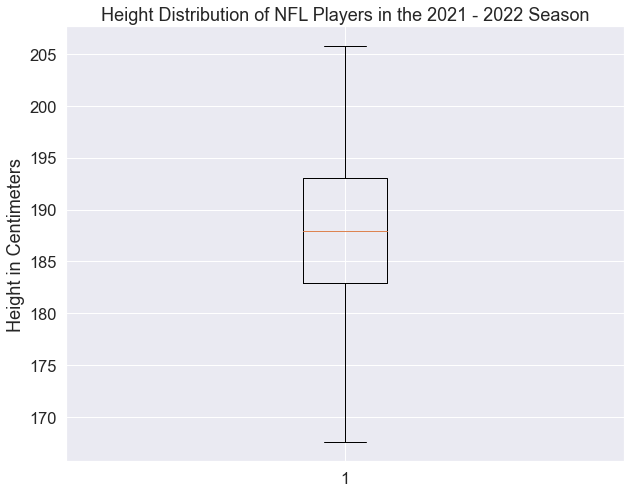

In [10]:
#show Box Plot of Heights with IQR
sbn.set("notebook","darkgrid","deep",font_scale = 1.5, rc={"figure.figsize":(10, 8)})
plt.boxplot(height)
plt.title("Height Distribution of NFL Players in the 2021 - 2022 Season")
plt.ylabel("Height in Centimeters")
plt.show()

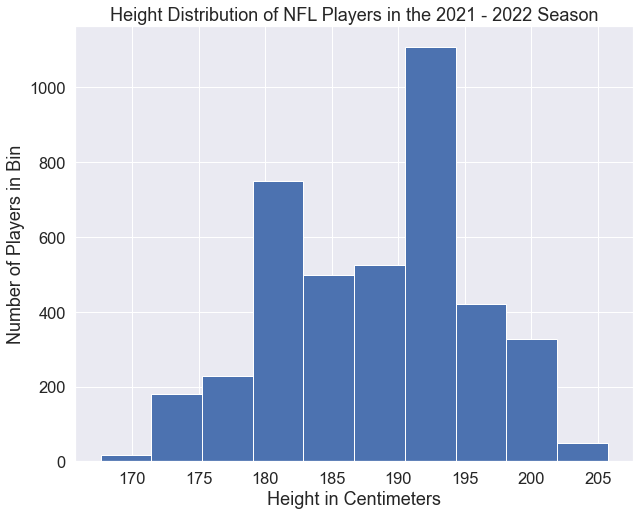

In [9]:
#show height distribution
sbn.set("notebook","darkgrid","deep",font_scale = 1.5, rc={"figure.figsize":(10, 8)})
plt.hist(height)
plt.title("Height Distribution of NFL Players in the 2021 - 2022 Season")
plt.xlabel("Height in Centimeters")
plt.ylabel("Number of Players in Bin")
plt.show()

In [10]:
#using pandas to convert height in dataframe
players['Height'] = players['Height'].str[0:1].astype(int)*30.48 + players['Height'].str[2:5].replace('"','', regex=True).astype(int)*2.54
    
players.head()

,PlayerID,Team,Number,FirstName,LastName,Position,Status,Height,Weight,BirthDate,...,ByeWeek,AverageDraftPosition,CollegeDraftTeam,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick,IsUndraftedFreeAgent,InjuryStatus,TeamID,FullName
0,430,,,Sam,Koch,P,Inactive,185.42,222,1982-08-13,...,,,BAL,2006.0,6.0,203.0,False,,,Sam Koch
1,722,,,Jason,Witten,TE,Inactive,198.12,263,1982-05-06,...,,,DAL,2003.0,3.0,69.0,False,,,Jason Witten
2,1658,,,Greg,Olsen,TE,Inactive,195.58,255,1985-03-11,...,,,CHI,2007.0,1.0,31.0,False,,,Greg Olsen
3,2982,,,Stephen,Gostkowski,K,Inactive,185.42,215,1984-01-28,...,,,NE,2006.0,4.0,118.0,False,,,Stephen Gostkowski
4,3807,,,Ben,Roethlisberger,QB,Inactive,195.58,240,1982-03-02,...,,,PIT,2004.0,1.0,11.0,False,,,Ben Roethlisberger


## Exploration of Player Weights

In [12]:
players["Weight"].describe() 

count    4103.000000
mean      242.073605
std        46.781112
min       153.000000
25%       203.000000
50%       231.000000
75%       284.500000
max       380.000000
Name: Weight, dtype: float64

In [13]:
#calculate mean, standard deviation, min and max of player weights
weight = np.array(players["Weight"])

print("Mean of Player Weights = ", weight.mean())
print("Standard Deviation of Player Weights = ", weight.std())
print("Lowest Player Weight = ", weight.min())
print("Highest Player Weight = ", weight.max())

Mean of Player Weights =  242.0736046795028
Standard Deviation of Player Weights =  46.77541034833764
Lowest Player Weight =  153
Highest Player Weight =  380


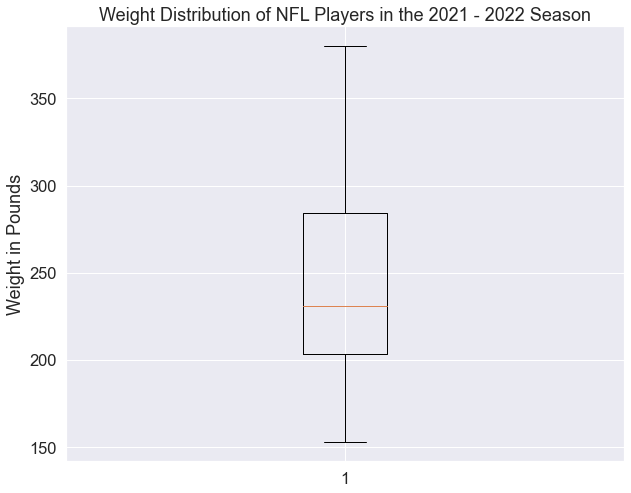

In [14]:
#show Box Plot of Weights with IQR
sbn.set("notebook","darkgrid","deep",font_scale = 1.5, rc={"figure.figsize":(10, 8)})
plt.boxplot(weight)
plt.title("Weight Distribution of NFL Players in the 2021 - 2022 Season")
plt.ylabel("Weight in Pounds")
plt.show()

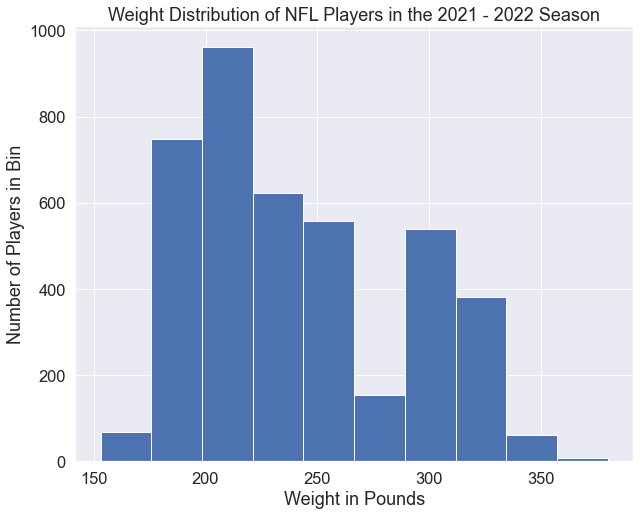

In [15]:
#show weight distribution
sbn.set("notebook","darkgrid","deep",font_scale = 1.5, rc={"figure.figsize":(10, 8)})
plt.hist(weight)
plt.title("Weight Distribution of NFL Players in the 2021 - 2022 Season")
plt.xlabel("Weight in Pounds")
plt.ylabel("Number of Players in Bin")
plt.show()

### Filter Active / Inactive Players

In [15]:
#create new dataframe of only active players
active = players[players["Status"] == "Active"]
active.head()

,PlayerID,Team,Number,FirstName,LastName,Position,Status,Height,Weight,BirthDate,...,ByeWeek,AverageDraftPosition,CollegeDraftTeam,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick,IsUndraftedFreeAgent,InjuryStatus,TeamID,FullName
1617,23996,JAX,14.0,Kendric,Pryor,WR,Active,180.34,189,1998-01-06,...,11.0,,CIN,2022.0,,,True,,15.0,Kendric Pryor
1619,23846,JAX,47.0,De'Shaan,Dixon,OLB,Active,195.58,247,1998-12-16,...,11.0,1973.0,JAX,2022.0,,,True,,15.0,De'Shaan Dixon
1625,23642,DEN,15.0,Jalen,Virgil,WR,Active,185.42,210,1998-07-13,...,9.0,453.0,DEN,2022.0,,,True,,10.0,Jalen Virgil
1626,23604,DEN,12.0,Montrell,Washington,WR,Active,177.80,170,1999-03-14,...,9.0,301.0,DEN,2022.0,5.0,162.0,False,,10.0,Montrell Washington
1627,23612,DEN,91.0,Matt,Henningsen,DE,Active,190.50,291,1999-05-01,...,9.0,1696.0,DEN,2022.0,6.0,206.0,False,,10.0,Matt Henningsen


In [16]:
#create new dataframe excluding active players
inactive = players[players["Status"] != "Active"]
inactive.head()

,PlayerID,Team,Number,FirstName,LastName,Position,Status,Height,Weight,BirthDate,...,ByeWeek,AverageDraftPosition,CollegeDraftTeam,CollegeDraftYear,CollegeDraftRound,CollegeDraftPick,IsUndraftedFreeAgent,InjuryStatus,TeamID,FullName
0,430,,,Sam,Koch,P,Inactive,185.42,222,1982-08-13,...,,,BAL,2006.0,6.0,203.0,False,,,Sam Koch
1,722,,,Jason,Witten,TE,Inactive,198.12,263,1982-05-06,...,,,DAL,2003.0,3.0,69.0,False,,,Jason Witten
2,1658,,,Greg,Olsen,TE,Inactive,195.58,255,1985-03-11,...,,,CHI,2007.0,1.0,31.0,False,,,Greg Olsen
3,2982,,,Stephen,Gostkowski,K,Inactive,185.42,215,1984-01-28,...,,,NE,2006.0,4.0,118.0,False,,,Stephen Gostkowski
4,3807,,,Ben,Roethlisberger,QB,Inactive,195.58,240,1982-03-02,...,,,PIT,2004.0,1.0,11.0,False,,,Ben Roethlisberger


### Export Dataframes into Excel Files

In [18]:
#export active players dataframe
active.to_excel(r'C:\Users\leand\Downloads\Active Players.xlsx', sheet_name='Active', index = False)

In [19]:
#export inactive players dataframe
inactive.to_excel(r'C:\Users\leand\Downloads\Inactive Players.xlsx', sheet_name='Inactive', index = False)

### Failed Attempt to Calculate Player Ages

In [6]:
# remove timestap from birthdate column
players['BirthDate'] = pd.to_datetime(players['BirthDate'])
#players['BirthDate'] = players['BirthDate'].dt.date
players['BirthDate'].head()

0   1982-08-13
1   1982-05-06
2   1985-03-11
3   1984-01-28
4   1982-03-02
Name: BirthDate, dtype: datetime64[ns]

In [7]:
#create new column to save Date of Birth
players['DOB'] = players['BirthDate'].str.split(' ', n=-1, expand=True)
players['DOB'].head()

AttributeError: Can only use .str accessor with string values!

### Failed Attempt to Download Player Photos

In [4]:
# download player headshots 

for i in seq_len(nrow(players)): {
    download.file(url = players["PhotoURL "], 
    destfile = paste0('files', players["FanDuelName "], 
         '.png'), method = 'curl')
}


NameError: name 'seq_len' is not defined

### Second Failed Attempt to Download Player Photos

In [27]:
url_list = list(players['PhotoUrl'])
name_list = list(players['FanDuelName'])

headers = {
    'Authorization': 'Bearer %s' ,
    'Accept-Encoding': 'gzip',
}

result = list(zip(url_list,name_list))
for i,j in result:
    url_list ='PhotoUrl ' + i
    response = requests.get(url, headers=headers)
    print(response.status_code)
    original_stdout = sys.stdout
    
    with open(j, 'w') as f:
        sys.stdout = f
        print(response.text)
        sys.stdout = original_stdout

NameError: name 'url' is not defined

In [20]:
!pip install wget
!pip install tldextract

import requests
import shutil
import wget
import os
import subprocess
import urllib.request
from bs4 import BeautifulSoup
import tldextract

In [21]:
!mkdir Player_Photos

A subdirectory or file Player_Photos already exists.


In [25]:
!ls

 Volume in drive C is Windows
 Volume Serial Number is BA8F-7F5E

 Directory of C:\Users\leand\Desktop\Elise School\2022 Data Science Capstone\FantasyData\Player_Photos

11/03/2022  01:57 PM    <DIR>          .
11/03/2022  02:04 PM    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  317,948,530,688 bytes free


In [23]:
os.chdir('Player_Photos')

In [26]:
pwd

'C:\\Users\\leand\\Desktop\\Elise School\\2022 Data Science Capstone\\FantasyData\\Player_Photos'

In [77]:
all_images = ['https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nfl/low-res/23996.png', 
       'https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nfl/low-res/23846.png']

In [65]:
broken_photos = []

In [66]:
photo_links = list(active["PhotoUrl"])


In [67]:
test = ['https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nfl/low-res/23996.png', 
       'https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nfl/low-res/23846.png']

In [68]:
for i in test:

    file_name = i.split('/', [-1])

    req = requests.get(i, stream=True)

    if req.status_code == 200:
        with open(file_name, 'wb') as f:
            for chunk in r:
                f.write(chunk)

    else:
        broken_photos.append(i)

    print(file_name)


TypeError: 'list' object cannot be interpreted as an integer

In [72]:
def download_images(photo_links:list, directory_path):
    
    os.chdir(directory_path)
    
    for img in photo_links:
        file_name = img.split('/', [-1])
        
        url_path = [img, img.rep('https://', 'https://www.')]
        
        for url_image in url_path:
            try:
                r = requests.get(img, stream=True)
                if r.status_code == 200:
                    with open(file_name, 'wb') as f:
                        for chunk in r:
                            f.write(chunk)
            except Exception as e:
                pass


In [73]:
path = 'C:\\Users\\leand\\Desktop\\Elise School\\2022 Data Science Capstone\\FantasyData\\Player_Photos'

In [79]:
download_images(photo_links=photo_links, directory_path=path)

TypeError: 'list' object cannot be interpreted as an integer